In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

crime_data = pd.read_csv("/content/drive/MyDrive/SPD_Crime_Data__2008-Present_20240429.csv")

In [92]:
crime_data.head()

,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude
0,2020-044620,12605873663,02/05/2020 10:10:00 AM,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387
1,2020-044452,12605598696,02/03/2020 08:00:00 AM,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118
2,2020-044465,12605567653,02/02/2020 08:30:00 PM,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384
3,2020-044225,12605174036,02/05/2020 01:17:00 AM,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927
4,2020-044076,12605081469,02/05/2020 12:51:21 AM,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193


In [93]:
crime_data.count()

Report Number             1116587
Offense ID                1116587
Offense Start DateTime    1114848
Offense End DateTime       639026
Report DateTime           1116587
Group A B                 1116587
Crime Against Category    1116587
Offense Parent Group      1116587
Offense                   1116587
Offense Code              1116587
Precinct                  1116580
Sector                    1116580
Beat                      1116580
MCPP                      1116560
100 Block Address         1066325
Longitude                 1116587
Latitude                  1116587
dtype: int64

In [94]:
crime_data.dropna(subset=['Offense Start DateTime', 'Offense Parent Group', 'Longitude', 'Latitude'], inplace=True)

In [95]:
crime_data.count()

Report Number             1114848
Offense ID                1114848
Offense Start DateTime    1114848
Offense End DateTime       638878
Report DateTime           1114848
Group A B                 1114848
Crime Against Category    1114848
Offense Parent Group      1114848
Offense                   1114848
Offense Code              1114848
Precinct                  1114841
Sector                    1114841
Beat                      1114841
MCPP                      1114821
100 Block Address         1064850
Longitude                 1114848
Latitude                  1114848
dtype: int64

In [96]:
# Temporal Analysis
# Extract year, month, and day of the week
crime_data['Offense Start DateTime'] = pd.to_datetime(crime_data['Offense Start DateTime'])
crime_data['Year'] = crime_data['Offense Start DateTime'].dt.year.astype(int)
crime_data['Month'] = crime_data['Offense Start DateTime'].dt.month.astype(int)
crime_data['DayOfWeek'] = crime_data['Offense Start DateTime'].dt.dayofweek


In [97]:
crime_count_per_year = crime_data.groupby('Year').size()

crime_count_per_year

Year
1908        1
1915        1
1920        1
1929        1
1934        1
1951        1
1953        1
1957        1
1960        1
1964        3
1968        1
1974        1
1975        1
1976        3
1977        2
1979        1
1980        4
1982        1
1983        2
1984        1
1987        4
1988        2
1989        1
1990        3
1991       16
1992        4
1993        7
1994        5
1995       10
1996        6
1997       16
1998       25
1999       15
2000       73
2001       95
2002       35
2003       60
2004       96
2005      120
2006      239
2007     1058
2008    64482
2009    65088
2010    63258
2011    59240
2012    58982
2013    63670
2014    69557
2015    67862
2016    70407
2017    73085
2018    75327
2019    70446
2020    76341
2021    71226
2022    74955
2023    69832
2024    19171
dtype: int64

In [98]:
pd.unique(crime_data['Year'])

array([2020, 2019, 2018, 2017, 2016, 2014, 2012, 2006, 2011, 2015, 2010,
       2013, 2009, 2002, 2007, 2008, 2004, 2005, 1977, 1991, 2000, 1998,
       1995, 2003, 2001, 1999, 1990, 1993, 1994, 1997, 1987, 1996, 1964,
       1992, 1980, 1908, 2021, 1979, 1915, 1929, 1974, 1984, 1989, 1953,
       1976, 1920, 1988, 2022, 1983, 2023, 1960, 1957, 1982, 1968, 1951,
       1975, 2024, 1934])

In [99]:
crime_data_filtered = crime_data[(crime_data['Year'] >= 2008) & (crime_data['Year'] <= 2023)]

crime_data_filtered


,Report Number,Offense ID,Offense Start DateTime,Offense End DateTime,Report DateTime,Group A B,Crime Against Category,Offense Parent Group,Offense,Offense Code,Precinct,Sector,Beat,MCPP,100 Block Address,Longitude,Latitude,Year,Month,DayOfWeek
0,2020-044620,12605873663,2020-02-05 10:10:00,NaN,02/05/2020 11:24:31 AM,A,SOCIETY,DRUG/NARCOTIC OFFENSES,Drug/Narcotic Violations,35A,W,Q,Q1,MAGNOLIA,32XX BLOCK OF 23RD AVE W,-122.385974,47.649387,2020,2,2
1,2020-044452,12605598696,2020-02-03 08:00:00,02/04/2020 08:00:00 AM,02/05/2020 10:06:28 AM,A,PROPERTY,LARCENY-THEFT,Theft of Motor Vehicle Parts or Accessories,23G,N,J,J3,ROOSEVELT/RAVENNA,63XX BLOCK OF 5TH AVE NE,-122.323399,47.675118,2020,2,0
2,2020-044465,12605567653,2020-02-02 20:30:00,02/02/2020 09:30:00 PM,02/05/2020 09:39:33 AM,A,PROPERTY,ROBBERY,Robbery,120,N,U,U3,ROOSEVELT/RAVENNA,26TH AVE NE / NE BLAKELEY ST,-122.299552,47.666384,2020,2,6
3,2020-044225,12605174036,2020-02-05 01:17:00,02/05/2020 02:21:00 AM,02/05/2020 03:30:55 AM,A,PROPERTY,DESTRUCTION/DAMAGE/VANDALISM OF PROPERTY,Destruction/Damage/Vandalism of Property,290,W,Q,Q1,MAGNOLIA,22XX BLOCK OF W RAYE ST,-122.384865,47.642927,2020,2,2
4,2020-044076,12605081469,2020-02-05 00:51:21,NaN,02/05/2020 12:51:31 AM,B,SOCIETY,DRIVING UNDER THE INFLUENCE,Driving Under the Influence,90D,N,B,B2,BALLARD SOUTH,NW 46TH ST / 8TH AVE NW,-122.366195,47.662193,2020,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1116582,2013-247888,7687554356,2013-07-13 01:00:00,NaN,07/13/2013 06:37:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,SW,F,F1,PIGEON POINT,41XX BLOCK OF 20TH AVE SW,-122.359028,47.565702,2013,7,5
1116583,2013-227022,7682354808,2013-06-26 11:00:00,06/29/2013 06:30:00 AM,06/29/2013 09:43:00 AM,A,PROPERTY,MOTOR VEHICLE THEFT,Motor Vehicle Theft,240,W,Q,Q3,QUEEN ANNE,1ST AVE N / VALLEY ST,-122.355386,47.626251,2013,6,2
1116584,2012-045494,7672915592,2012-02-14 15:04:00,NaN,02/14/2012 03:04:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,N,U,U1,ROOSEVELT/RAVENNA,73XX BLOCK OF ROOSEVELT WAY NE,-122.317464,47.681894,2012,2,1
1116585,2010-328592,7692227482,2010-09-19 16:59:00,NaN,09/19/2010 04:59:00 PM,A,PROPERTY,LARCENY-THEFT,Shoplifting,23C,W,M,M3,DOWNTOWN COMMERCIAL,5XX BLOCK OF PIKE ST,-122.335018,47.610909,2010,9,6


In [108]:
crime_count_per_year = crime_data.groupby('Year').size()
crime_count_per_year

Year
1908        1
1915        1
1920        1
1929        1
1934        1
1951        1
1953        1
1957        1
1960        1
1964        3
1968        1
1974        1
1975        1
1976        3
1977        2
1979        1
1980        4
1982        1
1983        2
1984        1
1987        4
1988        2
1989        1
1990        3
1991       16
1992        4
1993        7
1994        5
1995       10
1996        6
1997       16
1998       25
1999       15
2000       73
2001       95
2002       35
2003       60
2004       96
2005      120
2006      239
2007     1058
2008    64482
2009    65088
2010    63258
2011    59240
2012    58982
2013    63670
2014    69557
2015    67862
2016    70407
2017    73085
2018    75327
2019    70446
2020    76341
2021    71226
2022    74955
2023    69832
2024    19171
dtype: int64

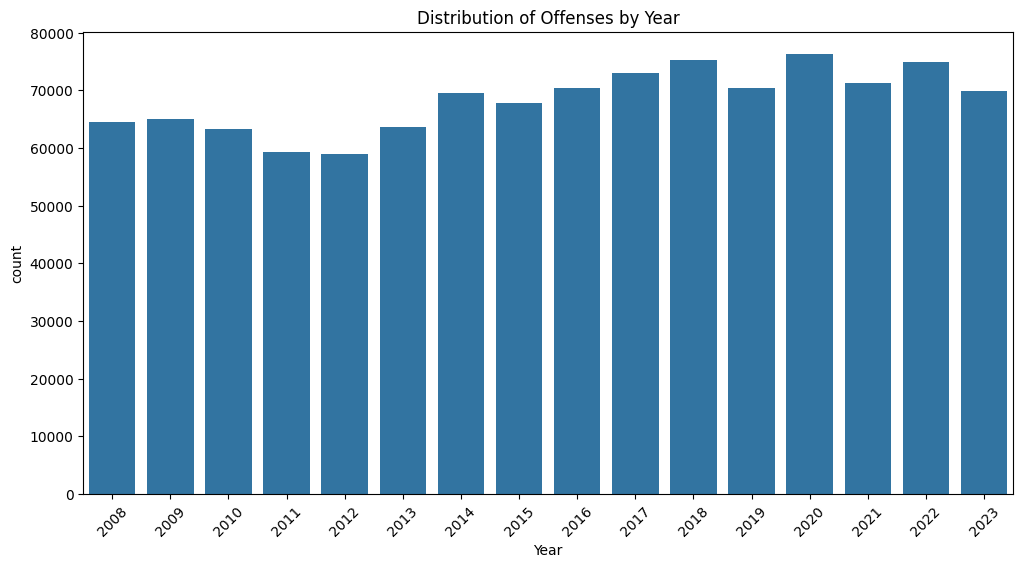

In [100]:
# Temporal trends by year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=crime_data_filtered)
plt.title('Distribution of Offenses by Year')
plt.xticks(rotation=45)
plt.show()

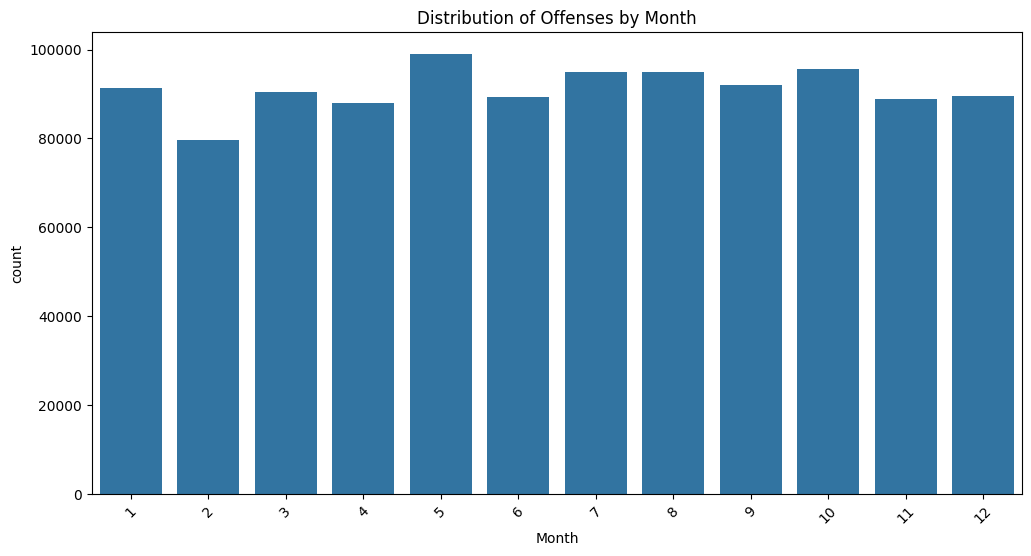

In [101]:
# Temporal trends by month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=crime_data_filtered)
plt.title('Distribution of Offenses by Month')
plt.xticks(rotation=45)
plt.show()


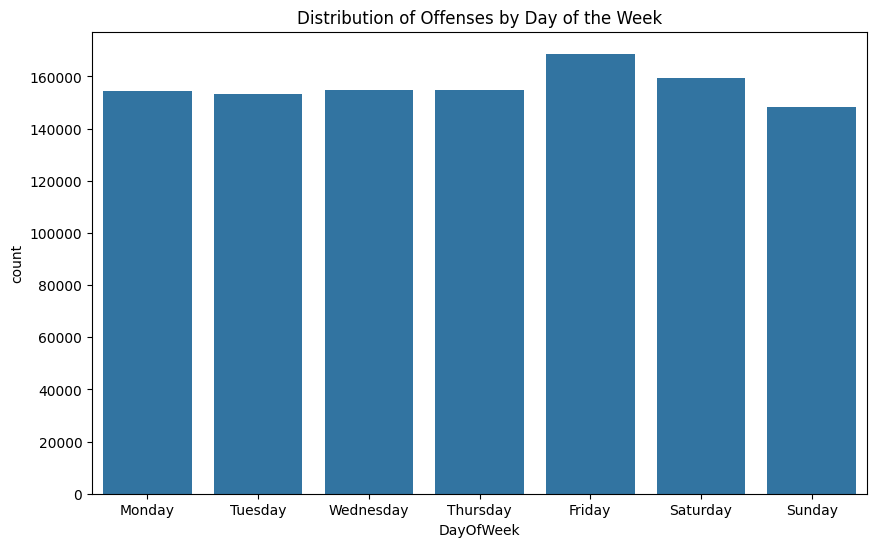

In [102]:
# Temporal trends by day
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=crime_data_filtered)
plt.title('Distribution of Offenses by Day of the Week')
plt.xticks(ticks=np.arange(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

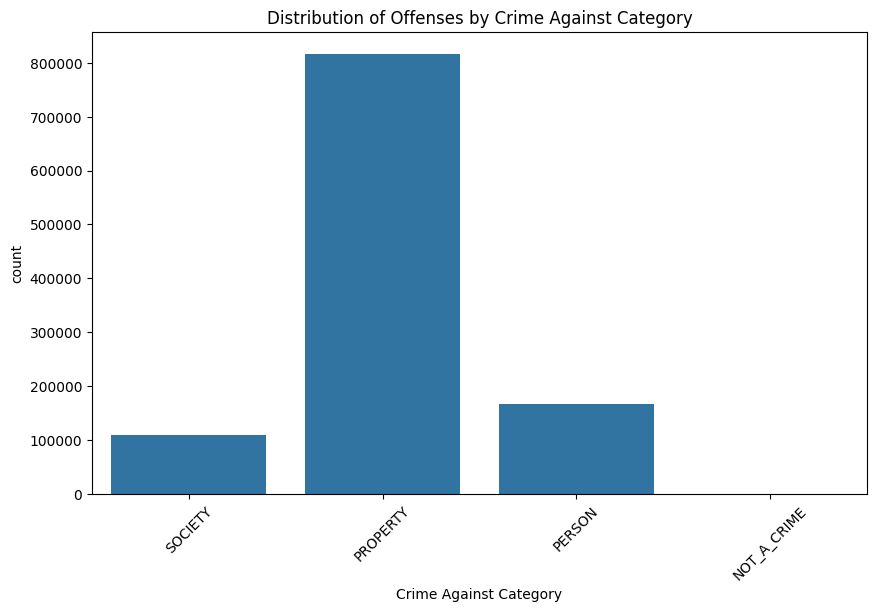

In [103]:
# Crime Against Category
plt.figure(figsize=(10, 6))
sns.countplot(x='Crime Against Category', data=crime_data_filtered)
plt.title(f'Distribution of Offenses by Crime Against Category')
plt.xticks(rotation=45)
plt.show()


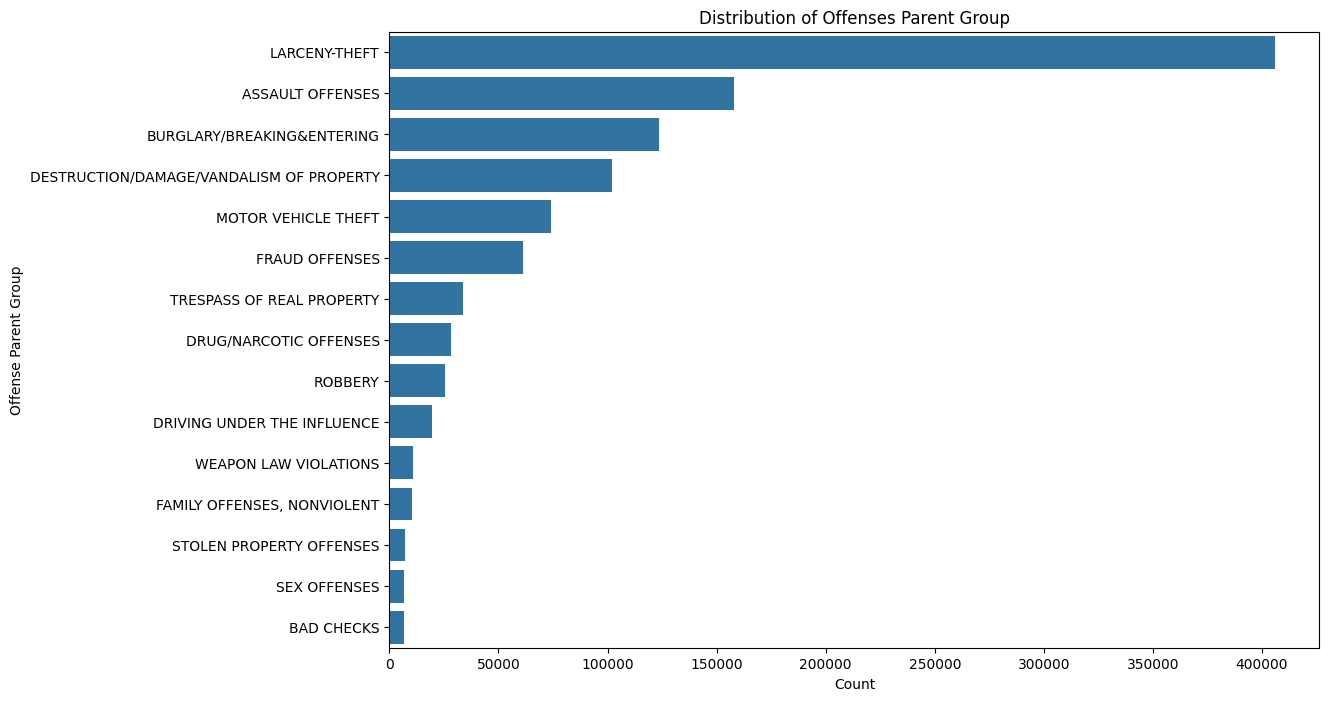

In [104]:
# Top 15 Offenses Parent Group
plt.figure(figsize=(12, 8))
offense_group_counts = crime_data_filtered['Offense Parent Group'].value_counts().nlargest(15)
sns.barplot(x=offense_group_counts.values, y=offense_group_counts.index)
plt.title('Top 15 Offenses Parent Group')
plt.xlabel('Count')
plt.ylabel('Offense Parent Group')
plt.show()

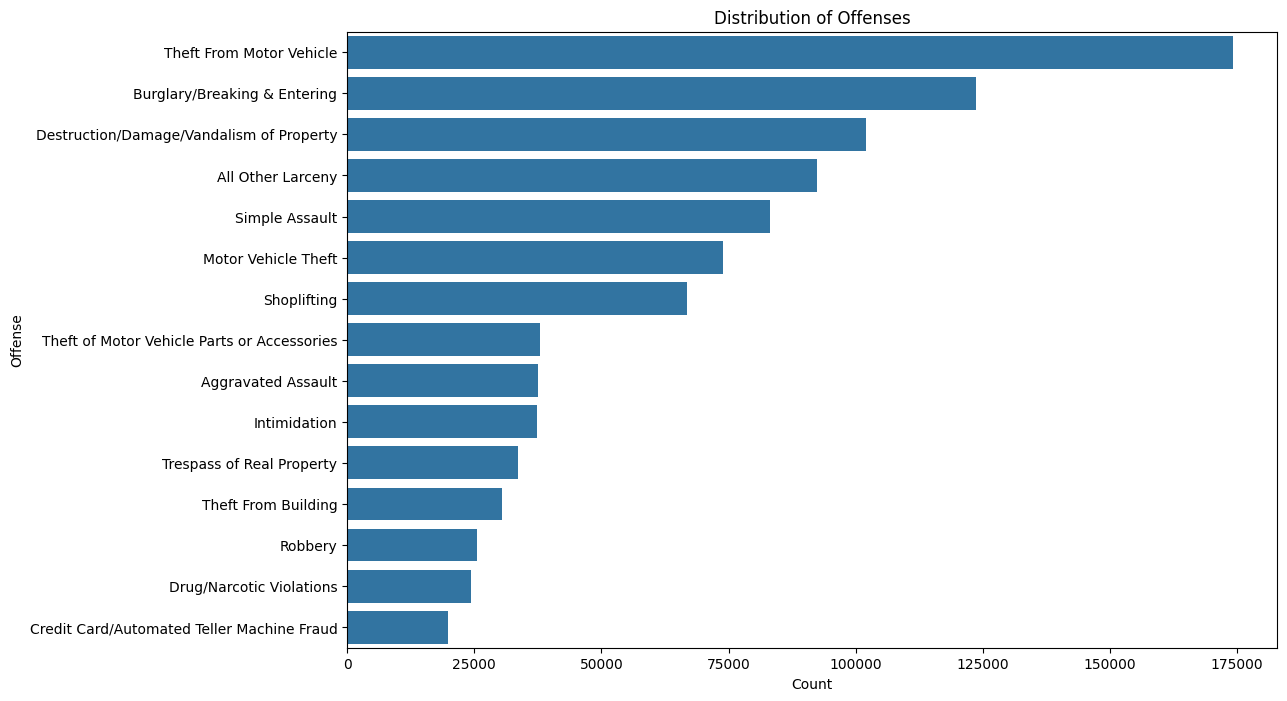

In [105]:
# Top 15 Offenses Types
plt.figure(figsize=(12, 8))
offense_counts = crime_data_filtered['Offense'].value_counts().nlargest(15)
sns.barplot(x=offense_counts.values, y=offense_counts.index)
plt.title('Top 15 Offenses')
plt.xlabel('Count')
plt.ylabel('Offense')
plt.show()


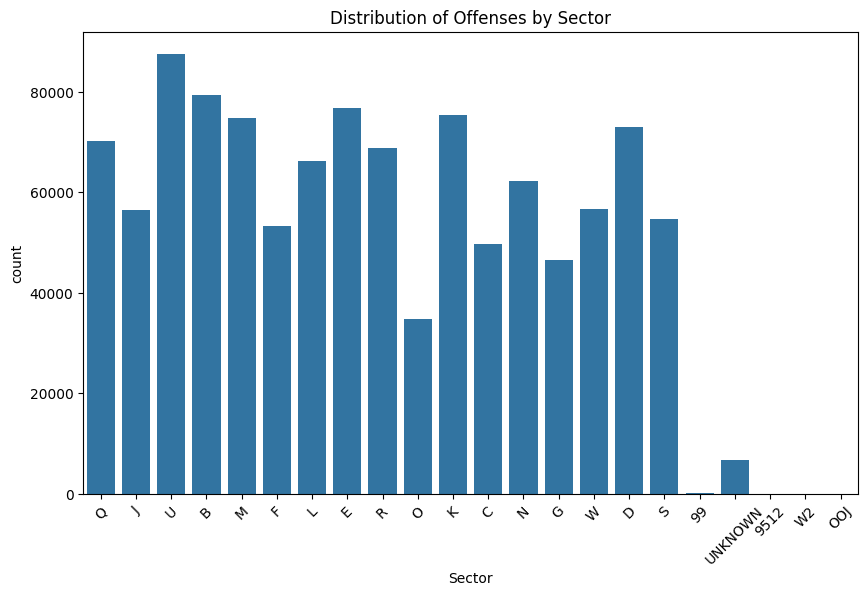

In [106]:
# Distribution by Sector
plt.figure(figsize=(10, 6))
sns.countplot(x='Sector', data=crime_data_filtered)
plt.title('Distribution of Offenses by Sector')
plt.xticks(rotation=45)
plt.show()


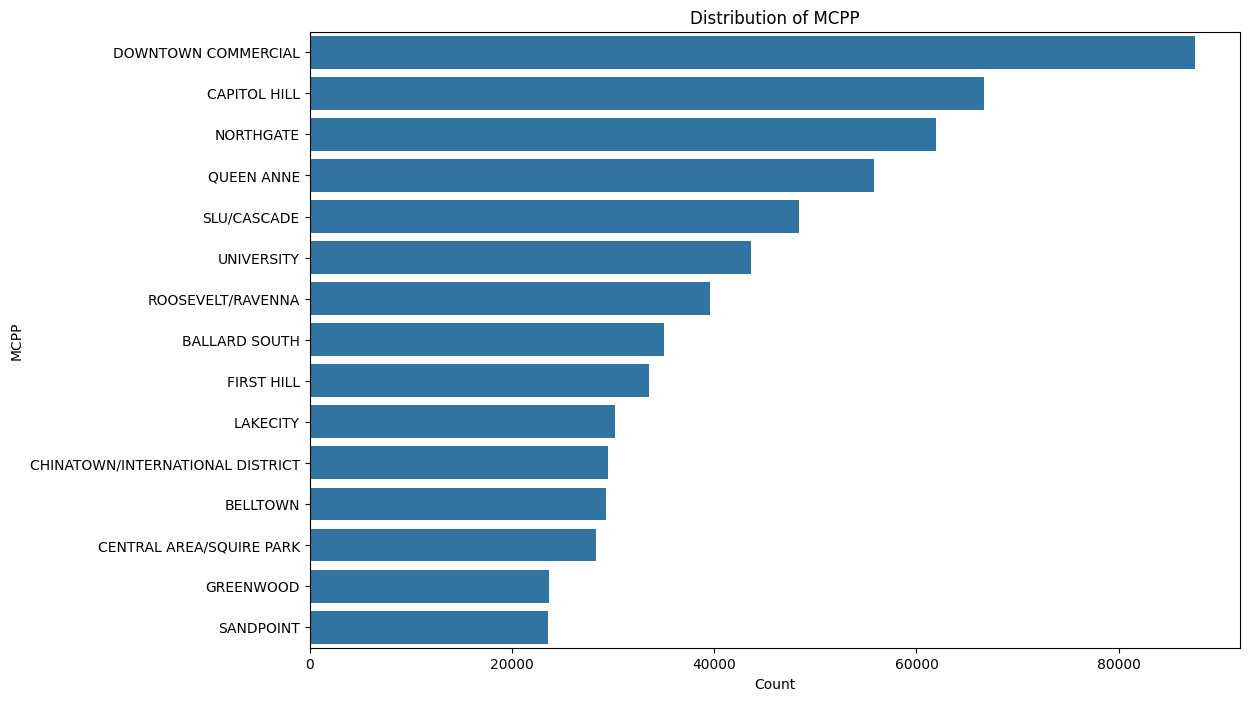

In [107]:
# MCPP - Designated Micro-Community Policing Plans (MCPP) boundary where offense(s) occurred.
plt.figure(figsize=(12, 8))
MCPP_counts = crime_data_filtered['MCPP'].value_counts().nlargest(15)
sns.barplot(x=MCPP_counts.values, y=MCPP_counts.index)
plt.title('Distribution of MCPP')
plt.xlabel('Count')
plt.ylabel('MCPP')
plt.show()